In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




df = pd.read_csv("smh.csv")
print(df.head())

        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No                  Yes  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

/tmp/ipython-input-962828136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


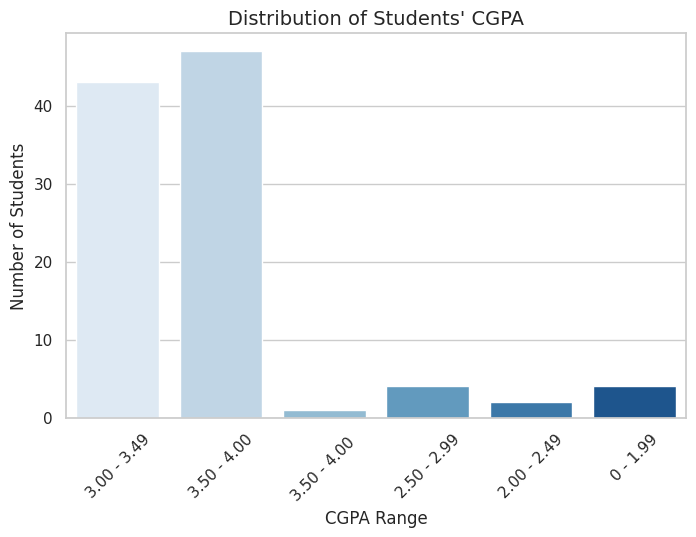

In [5]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x="What is your CGPA?",
    palette="Blues"
)

plt.title("Distribution of Students' CGPA", fontsize=14)
plt.xlabel("CGPA Range")
plt.ylabel("Number of Students")

plt.xticks(rotation=45)
plt.show()

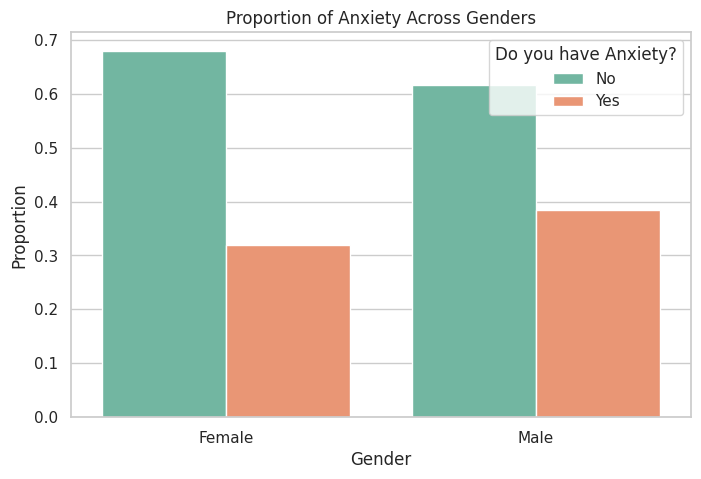

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create proportion table
anxiety_gender = (
    df.groupby("Choose your gender")["Do you have Anxiety?"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

plt.figure(figsize=(8,5))

sns.barplot(
    data=anxiety_gender,
    x="Choose your gender",
    y="Proportion",
    hue="Do you have Anxiety?",
    palette="Set2"
)

plt.title("Proportion of Anxiety Across Genders")
plt.ylabel("Proportion")
plt.xlabel("Gender")

plt.show()


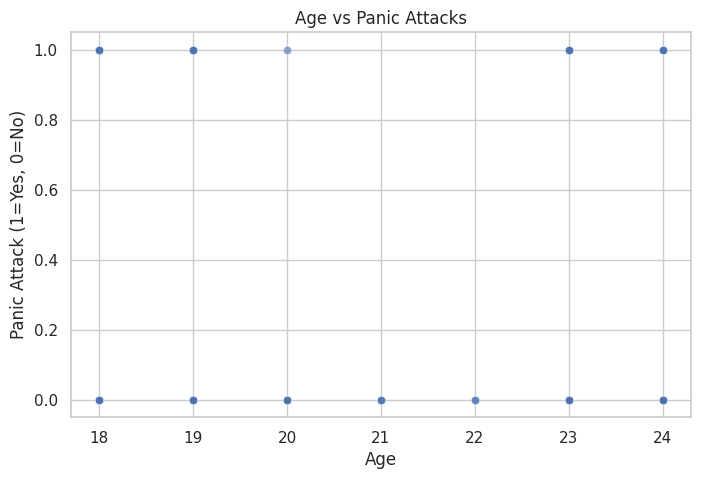

In [7]:
# Convert Panic attack to numeric
df["Panic_numeric"] = df["Do you have Panic attack?"].map({"Yes": 1, "No": 0})

plt.figure(figsize=(8,5))

sns.scatterplot(
    data=df,
    x="Age",
    y="Panic_numeric",
    alpha=0.6
)

plt.title("Age vs Panic Attacks")
plt.xlabel("Age")
plt.ylabel("Panic Attack (1=Yes, 0=No)")

plt.show()


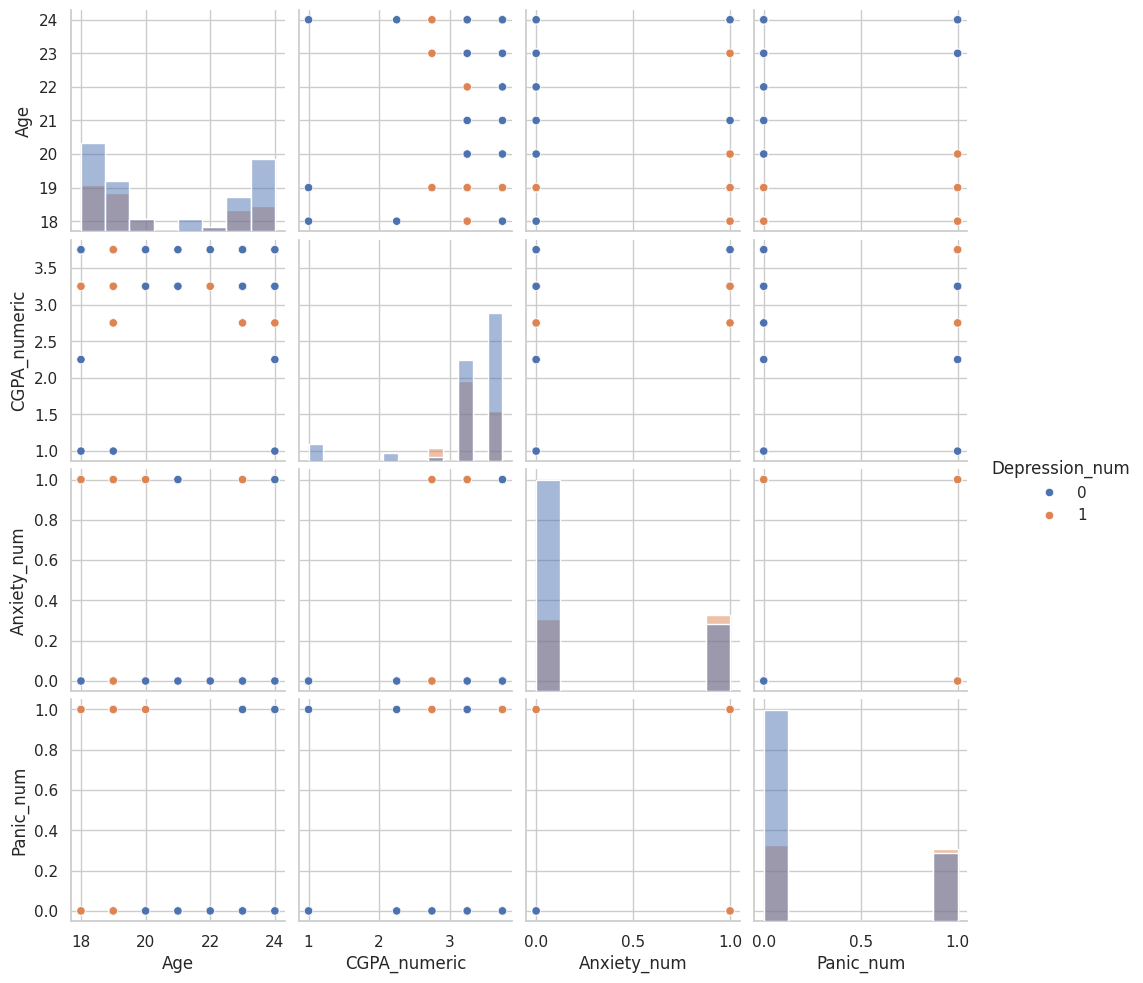

In [8]:
# Convert mental health columns to numeric
df["Depression_num"] = df["Do you have Depression?"].map({"Yes": 1, "No": 0})
df["Anxiety_num"] = df["Do you have Anxiety?"].map({"Yes": 1, "No": 0})
df["Panic_num"] = df["Do you have Panic attack?"].map({"Yes": 1, "No": 0})

# Convert CGPA ranges to numeric midpoint values
cgpa_mapping = {
    "0 - 1.99": 1.0,
    "2.00 - 2.49": 2.25,
    "2.50 - 2.99": 2.75,
    "3.00 - 3.49": 3.25,
    "3.50 - 4.00": 3.75
}

df["CGPA_numeric"] = df["What is your CGPA?"].map(cgpa_mapping)

# Select subset
subset = df[["Age", "CGPA_numeric", "Depression_num", "Anxiety_num", "Panic_num"]]

# Pairplot
sns.pairplot(subset, hue="Depression_num", diag_kind="hist")

plt.show()

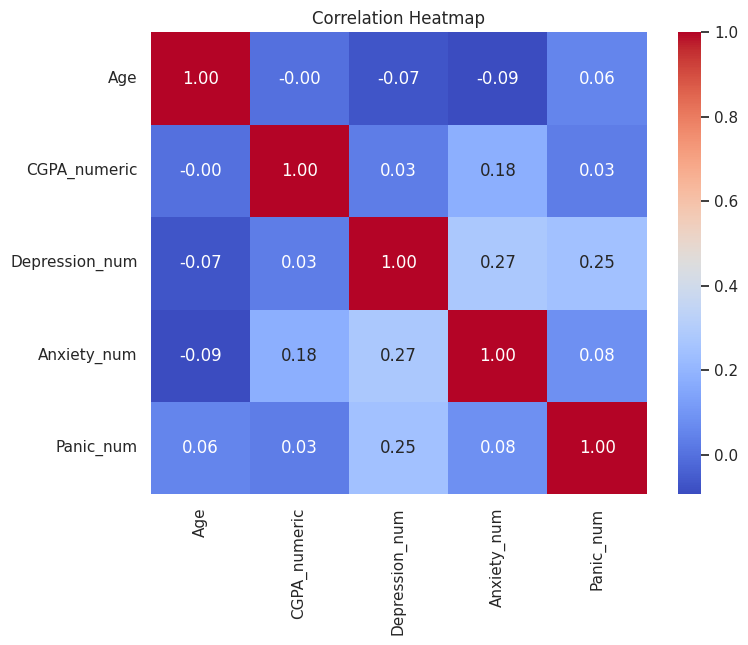

In [9]:
# Select numeric subset
numeric_subset = df[["Age", "CGPA_numeric", "Depression_num", "Anxiety_num", "Panic_num"]]

# Compute correlation matrix
corr_matrix = numeric_subset.corr()

plt.figure(figsize=(8,6))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap")
plt.show()


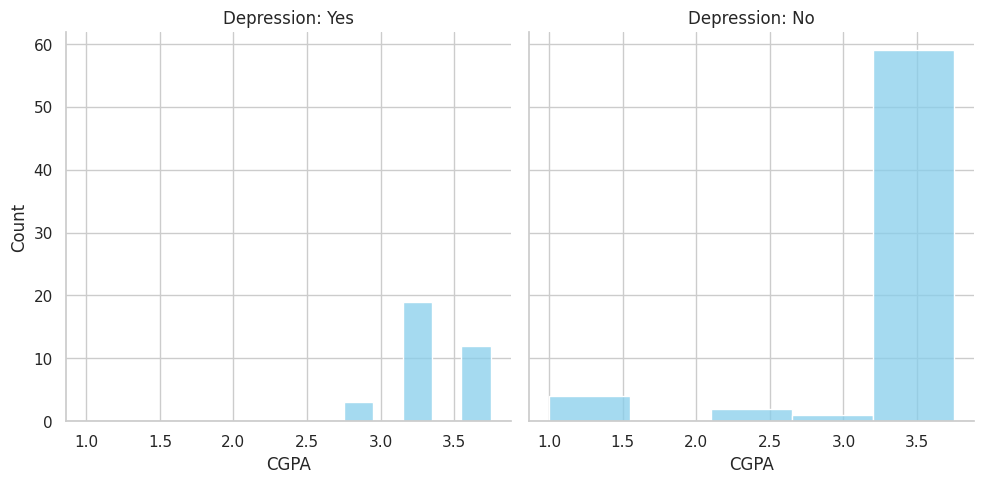

In [10]:
g = sns.FacetGrid(df, col="Do you have Depression?", height=5, aspect=1)

g.map(sns.histplot, "CGPA_numeric", bins=5, color="skyblue")

g.set_axis_labels("CGPA", "Count")
g.set_titles("Depression: {col_name}")

plt.show()